# Aligning Grids in NetCDF files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import xarray as xr

In [2]:
import rasterio

# Cliping netcdf file

from shapely.geometry import mapping
import geopandas as gpd  #for reading the shapefile
import regionmask  #For masking dataset

In [3]:
DATADIR = r"path"

<Axes: >

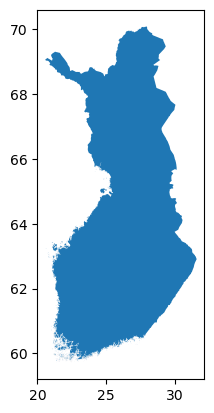

In [8]:
#Finland Shape file
shapefile = r"path"
shp_fin= gpd.read_file(shapefile)  # reading shapefile with geopandas
shp_fin.plot()

In [12]:
def clip_fin(cm, shp):
    cm = cm.rename({'latitude':'y', 'longitude':'x'}) # Specifiying the coordinate system
    cm.rio.write_crs("EPSG:4326",inplace= True)
    
    cm_fin= cm.rio.clip(shp.geometry.apply(mapping), shp.crs, all_touched= True, drop= True)
    #cm_fin= cm.rio.clip(shp.geometry.apply(mapping), shp.crs)
    
    cm_fin= cm_fin.rename({'y':'lat', 'x':'lon'})
    return cm_fin

In [11]:
ds_ref= xr.open_dataset(r"D:\Gridded_daily_observations-europe\precipitation\Finland\pr2.nc")
ds_ref

<xarray.Dataset>
Dimensions:    (latitude: 104, longitude: 110, time: 5844)
Coordinates:
  * latitude   (latitude) float64 59.75 59.85 59.95 60.05 ... 69.85 69.95 70.05
  * longitude  (longitude) float64 20.65 20.75 20.85 20.95 ... 31.35 31.45 31.55
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2010-12-31
Data variables:
    rr         (time, latitude, longitude) float32 ...
Attributes:
    E-OBS_version:  27.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Apr  3 08:55:26 2023: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [14]:
ds_fin= clip_fin(ds_ref, shp_fin)
ds_fin

<xarray.Dataset>
Dimensions:      (lat: 104, lon: 110, time: 5844)
Coordinates:
  * lat          (lat) float64 59.75 59.85 59.95 60.05 ... 69.85 69.95 70.05
  * lon          (lon) float64 20.65 20.75 20.85 20.95 ... 31.35 31.45 31.55
  * time         (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2010-12-31
    spatial_ref  int32 0
Data variables:
    rr           (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    E-OBS_version:  27.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Apr  3 08:55:26 2023: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

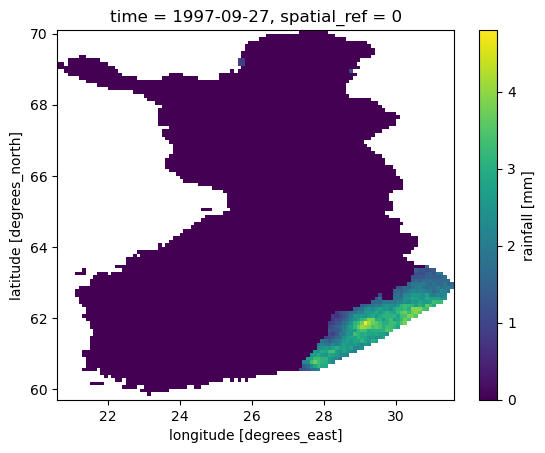

In [15]:
ds_fin.rr[1000].plot()

In [66]:
ds_ini= xr.open_dataset(r"D:\Ensemble_Finland\Finland\Bias corrected\Tasday\tas_cmip6_ens_ssp126.nc")
ds_ini

<xarray.Dataset>
Dimensions:      (time: 31390, lat: 76, lon: 80)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    experiment   object ...
    quantile     float64 ...
  * lon          (lon) float64 20.55 20.68 20.82 20.96 ... 31.25 31.39 31.53
  * lat          (lat) float64 70.12 69.98 69.84 69.7 ... 59.97 59.83 59.69
    spatial_ref  int32 ...
Data variables:
    tas          (time, lat, lon) float64 ...
Attributes:
    experiment_id:  ssp126
    variable_id:    tas
    source_id:      cmip6_ens
    regrid_method:  bilinear

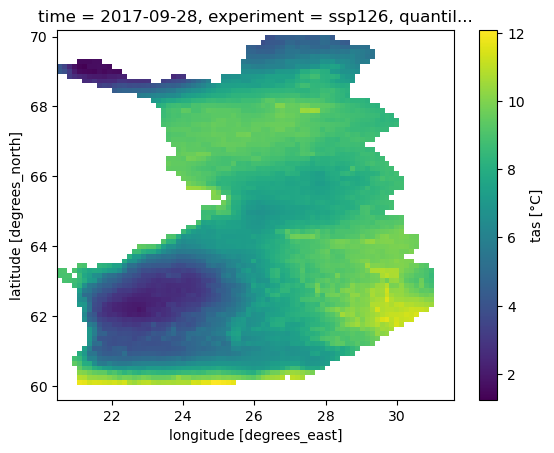

In [67]:
ds_ini['tas'][1000].plot()

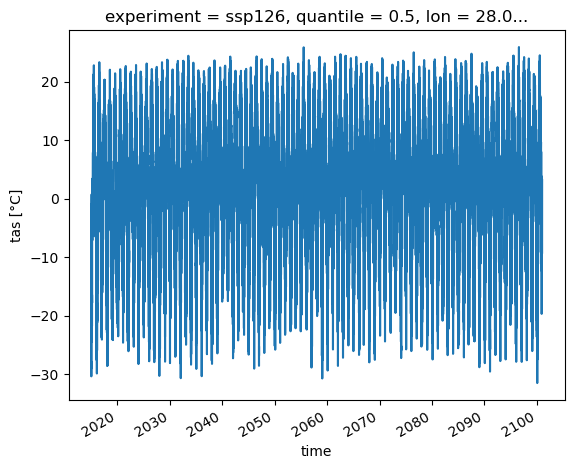

In [68]:
ds_ini['tas'].sel(lat=64, lon=28, method='nearest').plot()

In [ ]:
#Aligning coodinates

In [24]:
ds_fin

<xarray.Dataset>
Dimensions:      (lat: 104, lon: 110, time: 5844)
Coordinates:
  * lat          (lat) float64 59.75 59.85 59.95 60.05 ... 69.85 69.95 70.05
  * lon          (lon) float64 20.65 20.75 20.85 20.95 ... 31.35 31.45 31.55
  * time         (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2010-12-31
    spatial_ref  int32 0
Data variables:
    rr           (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    E-OBS_version:  27.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Apr  3 08:55:26 2023: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [26]:
def project_match(cm, cm_ref):
    cm = cm.rename({'lat':'y', 'lon':'x'}) # Specifiying the coordinate system
    cm_ref = cm_ref.rename({'lat':'y', 'lon':'x'})
    
    
    cm_proj= cm.rio.reproject_match(cm_ref)
    cm_proj= cm_proj.rename({'y':'lat', 'x':'lon'})
    return cm_proj

In [69]:
ds= project_match(ds_ini,ds_fin)
ds

<xarray.Dataset>
Dimensions:      (lon: 110, lat: 104, time: 31390)
Coordinates:
  * lon          (lon) float64 20.65 20.75 20.85 20.95 ... 31.35 31.45 31.55
  * lat          (lat) float64 59.75 59.85 59.95 60.05 ... 69.85 69.95 70.05
    experiment   <U6 'ssp126'
    quantile     float64 0.5
  * time         (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    spatial_ref  int32 0
Data variables:
    tas          (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    experiment_id:  ssp126
    variable_id:    tas
    source_id:      cmip6_ens
    regrid_method:  bilinear

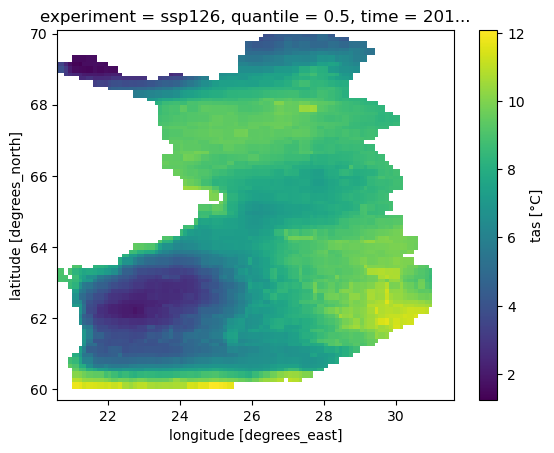

In [70]:
ds.tas[1000].plot()

In [71]:
ds.to_netcdf(r"path\name_SSP126.nc")